In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('data.csv')
import warnings

In [7]:
def ignore_warn(*afs, **kwargs):
    pass


In [8]:
warnings.warn = ignore_warn


In [10]:
l_train = len(data[data['SalePrice'].notnull()])
train = data[:l_train]
y = train['SalePrice']
x = train.drop('SalePrice', axis=1).values


In [14]:
def scoring(model):
    r = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5)
    score = -r 
    return(score)

clf = Lasso(alpha=0.0005)
score = scoring(clf)
print("bias:{:.4f} ({:.4f}".format(score.mean(), score.std()))


bias:0.0121 (0.0013


In [15]:
clf = Lasso(alpha=0.005)
clf.fit(x, y)

print('featrues:%d' %len(data.columns))
print('after being put in %d' % np.sum(clf.coef_ != 0))


featrues:367
after being put in 30


NameError: name 'trian_scores' is not defined

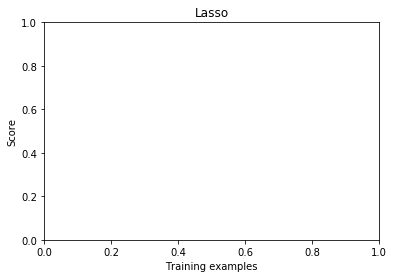

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
% matplotlib inline 

def plot_learning_curve(estimator, title, x, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, scoring="neg_mean_squared_error",
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(-trian_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=-1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    plt.grid()
    plt.fill_betewwn(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_socres_std, 
                    alpha=0.1, color='g')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                    test_scores_mean + test_scores_std, 
                    alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
            label='traing score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='testing score')
    plt.legend(loc='best')
    
    return plt

clf = Lasso(alpha=0.0005)
g = plot_learning_curve(clf, 'Lasso', x, y)

In [21]:
clf = Lasso(alpha=0.0005
          )
clf.fit(x, y)

test = data[l_train:].drop('SalePrice', axis=1).values

predict = np.exp(clf.predict(test))
resul = pd.DataFrame()
resul['SalePrice'] = predict
resul.to_csv('submission.csv', index=False)
